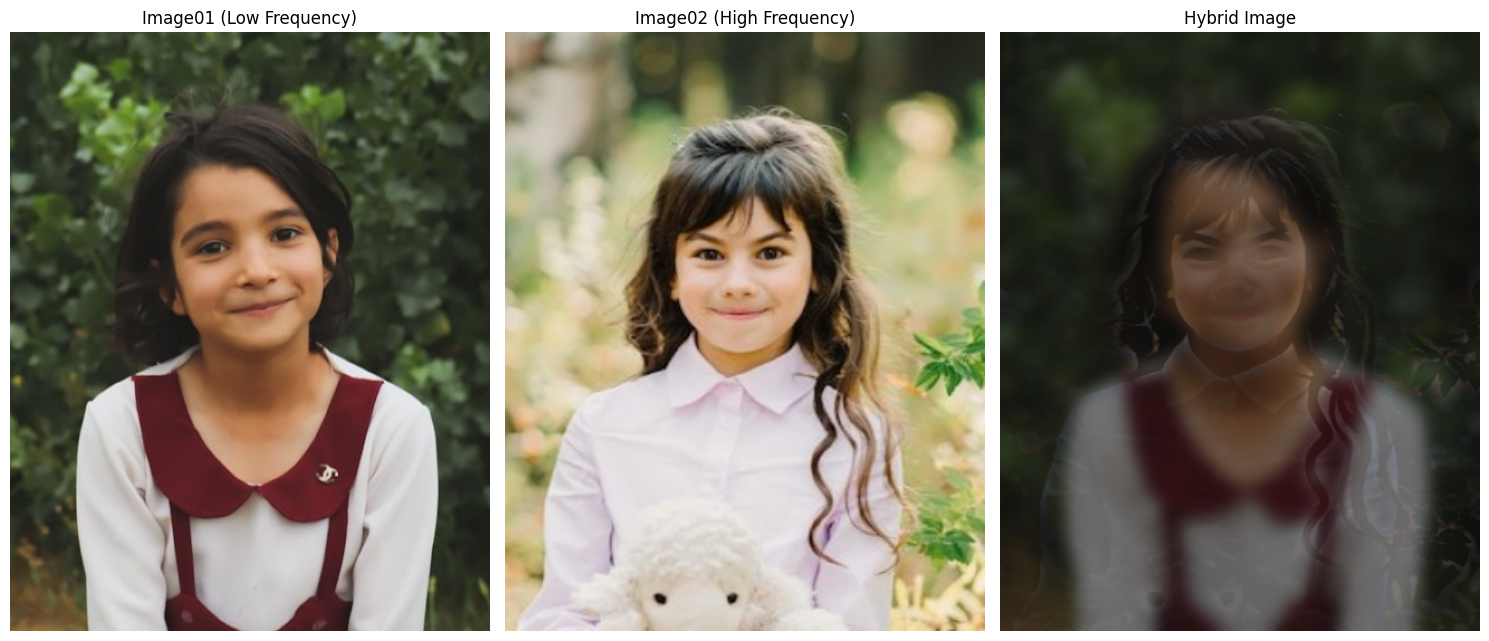

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def align_images(image1, image2):
    height, width = image1.shape[:2]
    image2 = cv2.resize(image2, (width, height))
    return image1, image2


def apply_low_pass_filter(image, sigma):
    return cv2.GaussianBlur(image, (0, 0), sigma)


def apply_high_pass_filter(image, sigma):
    low_frequencies = cv2.GaussianBlur(image, (0, 0), sigma)
    return cv2.subtract(image, low_frequencies)


def create_hybrid_image_rgb(image_low_freq, image_high_freq, low_cutoff, high_cutoff):

    low_freq_channels = cv2.split(image_low_freq)
    high_freq_channels = cv2.split(image_high_freq)

    hybrid_channels = []

    for low_channel, high_channel in zip(low_freq_channels, high_freq_channels):
        low_frequencies = apply_low_pass_filter(low_channel, low_cutoff)
        high_frequencies = apply_high_pass_filter(high_channel, high_cutoff)
        hybrid_channel = cv2.addWeighted(low_frequencies, 0.5, high_frequencies, 0.5, 0)
        hybrid_channels.append(hybrid_channel)

    hybrid_image = cv2.merge(hybrid_channels)
    return hybrid_image


image1 = cv2.imread("image01.jpg")
image2 = cv2.imread("image02.jpg")

if image1 is None or image2 is None:
    print("Error: One or both images not found. Check file paths.")
    exit()

dog_image, cat_image = align_images(image1, image2)

low_cutoff_frequency = 7
high_cutoff_frequency = 7

hybrid_image = create_hybrid_image_rgb(
    dog_image, cat_image, low_cutoff_frequency, high_cutoff_frequency
)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(dog_image, cv2.COLOR_BGR2RGB))
plt.title("Image01 (Low Frequency)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB))
plt.title("Image02 (High Frequency)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(hybrid_image, cv2.COLOR_BGR2RGB))
plt.title("Hybrid Image")
plt.axis("off")

plt.tight_layout()
plt.show()

